<a href="https://colab.research.google.com/github/vedasam-ch15/Google-Play-Store-Data-Analysis/blob/main/Topic_Modeling_apps.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
#data manipulation
import numpy as np
import pandas as pd
import seaborn as sns
import tqdm
#file and system operations
import os
import sys
assert sys.version_info >= (3,5)
#visualization imports
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
#consistent sized plots
from pylab import rcParams
rcParams['figure.figsize']=12,5
rcParams['axes.labelsize']=12
rcParams['ytick.labelsize']=12
rcParams['xtick.labelsize']=12
#handle unwanted warnings 
import warnings
warnings.filterwarnings(action='ignore',category=DeprecationWarning)
warnings.filterwarnings(action='ignore',category=FutureWarning)
#view all the columns
pd.options.display.max_columns = None
#basic text manipulation libraries
import nltk
nltk.download('averaged_perceptron_tagger')
nltk.download('wordnet')
nltk.download('omw-1.4')

from nltk.tokenize import word_tokenize
from nltk.tokenize import sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import SnowballStemmer
from nltk.stem import WordNetLemmatizer

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


# **FULL CATEGORY (BUSINESS APPS)**

In [3]:
full_data = pd.read_csv('/content/drive/MyDrive/design credits project/outputfile (1).csv')
full_data.head()

,appname,review-no,content,thumbsUpCount,score
0,ajio,1,This app showing 404 product not found error c...,0,1
1,ajio,2,Good 👍r response reasonable price,0,5
2,ajio,3,Very Good application to purchase appeal and f...,0,5
3,ajio,4,"I am trying to register, the app is asking for...",0,1
4,ajio,5,Isse ghatiya app maine na dekha h.. na hi dekh...,0,1


In [4]:
'''for (appname), group in full_data.groupby(['appname']):
     group.to_csv(f'{appname}.csv', index=False)
 
data = pd.read_csv('ajio.csv')
data.head()'''




"for (appname), group in full_data.groupby(['appname']):\n     group.to_csv(f'{appname}.csv', index=False)\n \ndata = pd.read_csv('ajio.csv')\ndata.head()"

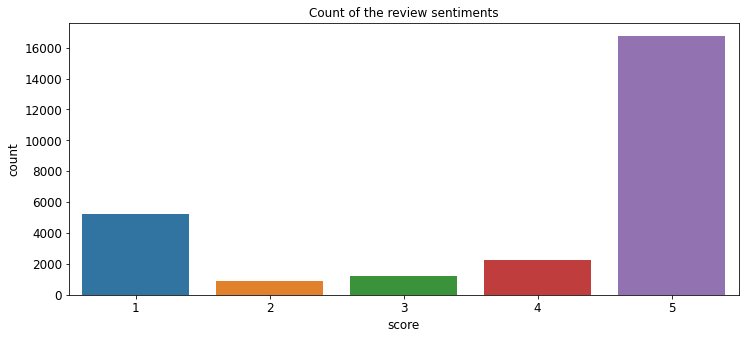

In [5]:
sns.countplot(full_data['score'])
plt.title('Count of the review sentiments')
plt.show()

In [6]:

import gensim

stemmer = SnowballStemmer('english')

def lemmatize_stemming(text):
 
    return stemmer.stem(WordNetLemmatizer().lemmatize(text,pos='n'))

def preprocess(text):
    
    result = []
    for token in gensim.utils.simple_preprocess(text):
        if token not in gensim.parsing.preprocessing.STOPWORDS and len(token) > 3:
            result.append(lemmatize_stemming(token))
    return result


In [7]:
processed_docs = []

for doc in full_data['content']:
    processed_docs.append(preprocess(doc))

In [8]:

dictionary = gensim.corpora.Dictionary(processed_docs)

In [9]:
dictionary.filter_extremes(no_below=5,no_above=0.1,keep_n=None)

In [10]:
bow_corpus = [dictionary.doc2bow(doc) for doc in processed_docs]

In [11]:

seed = 41
lda_model = gensim.models.LdaMulticore(corpus=bow_corpus,num_topics=6,id2word=dictionary,passes=10,workers=2,
                                      random_state=seed,minimum_probability=0.05)

In [20]:
for idx,topic in lda_model.print_topics(-1,num_words=8):
    print("Topic: {} \nWords: {}".format(idx, topic ))
    print("\n")

Topic: 0 
Words: 0.064*"work" + 0.034*"video" + 0.032*"download" + 0.025*"time" + 0.025*"super" + 0.023*"play" + 0.021*"cours" + 0.019*"issu"


Topic: 1 
Words: 0.205*"nice" + 0.120*"best" + 0.076*"busi" + 0.042*"use" + 0.041*"applic" + 0.033*"app" + 0.030*"help" + 0.026*"thank"


Topic: 2 
Words: 0.030*"like" + 0.029*"love" + 0.020*"updat" + 0.016*"option" + 0.015*"featur" + 0.012*"learn" + 0.012*"need" + 0.012*"invoic"


Topic: 3 
Words: 0.117*"great" + 0.049*"servic" + 0.042*"product" + 0.025*"price" + 0.020*"qualiti" + 0.018*"store" + 0.018*"applic" + 0.016*"avail"


Topic: 4 
Words: 0.073*"easi" + 0.059*"excel" + 0.045*"game" + 0.035*"experi" + 0.032*"busi" + 0.027*"amaz" + 0.026*"user" + 0.025*"friend"


Topic: 5 
Words: 0.047*"lead" + 0.039*"money" + 0.027*"sulekha" + 0.025*"custom" + 0.022*"worst" + 0.020*"fake" + 0.020*"servic" + 0.018*"wast"






*   Topic 1: Not working properly, issues with updates and login
*   Topic 2: Positive reviews (best platform, great app, thanks for the app...)
*   Topic 3: Like the app but issue with updates for better versions 
* Topic 4: Price related issues
* Topic 5: Recommending the app but need improvement
* Topic 6: Time waste because of the fakeness of the app




# **FUNCTION DEFINITIONS**

loading the data of a particular app

In [15]:
def load_app_csv(appname):
  for (appname), group in full_data.groupby(['appname']):
     group.to_csv(f'{appname}.csv', index=False)
 
  data = pd.read_csv('ajio.csv')
  return data


plotting the graph of a particular app

In [18]:

def graph(appname, data):
  sns.countplot(data['score'])
  plt.title('Count of the review sentiments')
  plt.show()

Preprocessing of apps

In [19]:
def preprocess(data):
  import gensim

  stemmer = SnowballStemmer('english')

  def lemmatize_stemming(text):
  
      return stemmer.stem(WordNetLemmatizer().lemmatize(text,pos='n'))

  def preprocess(text):
      
      result = []
      for token in gensim.utils.simple_preprocess(text):
          if token not in gensim.parsing.preprocessing.STOPWORDS and len(token) > 3:
              result.append(lemmatize_stemming(token))
      return result

  processed_docs = []

  for doc in data['content']:
      processed_docs.append(preprocess(doc))
      
  return processed_docs



model training

In [21]:
def lda(appname):
  data = load_app_csv(appname)
  pre = preprocess(data)
  dictionary = gensim.corpora.Dictionary(pre)
  dictionary.filter_extremes(no_below=5,no_above=0.1,keep_n=None)
  bow_corpus = [dictionary.doc2bow(doc) for doc in pre]

  seed = 41
  lda_model = gensim.models.LdaMulticore(corpus=bow_corpus,num_topics=6,id2word=dictionary,passes=10,workers=2,
                                      random_state=seed,minimum_probability=0.05)
  
  for idx,topic in lda_model.print_topics(-1,num_words=8):
    print("Topic: {} \nWords: {}".format(idx, topic ))
    print("\n")


In [13]:
appsnamelist = ['whatsapp','phonepe','shoekonnect','paytm','googlepay','drbindra','facebook','mailchimp','norbsoft','amazonpay','indianoil','udemy','digitaldukan','sulekha','segb','earnmoneyonline','indianmart','rcmbusiness','ghoshak','vyapar','anar','shopify','frshbooks','paypay','linkedin','monopoly','skype','jdbusiness','ajio','amazonbusiness']

# **1)WHATSAPP**

In [22]:
lda(appsnamelist[0])

Topic: 0 
Words: 0.061*"deliveri" + 0.052*"return" + 0.048*"custom" + 0.034*"worst" + 0.033*"care" + 0.033*"support" + 0.031*"poor" + 0.028*"day"


Topic: 1 
Words: 0.069*"order" + 0.044*"problem" + 0.041*"product" + 0.036*"place" + 0.033*"item" + 0.032*"solv" + 0.030*"price" + 0.029*"show"


Topic: 2 
Words: 0.044*"document" + 0.037*"show" + 0.037*"account" + 0.035*"time" + 0.033*"poor" + 0.033*"open" + 0.032*"regist" + 0.026*"upload"


Topic: 3 
Words: 0.074*"work" + 0.062*"applic" + 0.048*"best" + 0.043*"experi" + 0.042*"slow" + 0.029*"month" + 0.028*"sale" + 0.026*"ajio"


Topic: 4 
Words: 0.068*"product" + 0.053*"ajio" + 0.052*"busi" + 0.047*"price" + 0.033*"qualiti" + 0.032*"time" + 0.032*"worst" + 0.027*"retail"


Topic: 5 
Words: 0.090*"nice" + 0.049*"updat" + 0.046*"app" + 0.042*"login" + 0.038*"wholesal" + 0.032*"work" + 0.030*"wast" + 0.027*"bahut"




# **2)PHONEPE**

In [24]:
lda(appsnamelist[1])

Topic: 0 
Words: 0.061*"deliveri" + 0.052*"return" + 0.048*"custom" + 0.034*"worst" + 0.033*"care" + 0.033*"support" + 0.031*"poor" + 0.028*"day"


Topic: 1 
Words: 0.069*"order" + 0.044*"problem" + 0.041*"product" + 0.036*"place" + 0.033*"item" + 0.032*"solv" + 0.030*"price" + 0.029*"show"


Topic: 2 
Words: 0.044*"document" + 0.037*"show" + 0.037*"account" + 0.035*"time" + 0.033*"poor" + 0.033*"open" + 0.032*"regist" + 0.026*"upload"


Topic: 3 
Words: 0.074*"work" + 0.062*"applic" + 0.048*"best" + 0.043*"experi" + 0.042*"slow" + 0.029*"month" + 0.028*"sale" + 0.026*"ajio"


Topic: 4 
Words: 0.068*"product" + 0.053*"ajio" + 0.052*"busi" + 0.047*"price" + 0.033*"qualiti" + 0.032*"time" + 0.032*"worst" + 0.027*"retail"


Topic: 5 
Words: 0.090*"nice" + 0.049*"updat" + 0.046*"app" + 0.042*"login" + 0.038*"wholesal" + 0.032*"work" + 0.030*"wast" + 0.027*"bahut"




# **3)SHOEKONNECT**

In [25]:
lda(appsnamelist[2])

Topic: 0 
Words: 0.061*"deliveri" + 0.052*"return" + 0.048*"custom" + 0.034*"worst" + 0.033*"care" + 0.033*"support" + 0.031*"poor" + 0.028*"day"


Topic: 1 
Words: 0.069*"order" + 0.044*"problem" + 0.041*"product" + 0.036*"place" + 0.033*"item" + 0.032*"solv" + 0.030*"price" + 0.029*"show"


Topic: 2 
Words: 0.044*"document" + 0.037*"show" + 0.037*"account" + 0.035*"time" + 0.033*"poor" + 0.033*"open" + 0.032*"regist" + 0.026*"upload"


Topic: 3 
Words: 0.074*"work" + 0.062*"applic" + 0.048*"best" + 0.043*"experi" + 0.042*"slow" + 0.029*"month" + 0.028*"sale" + 0.026*"ajio"


Topic: 4 
Words: 0.068*"product" + 0.053*"ajio" + 0.052*"busi" + 0.047*"price" + 0.033*"qualiti" + 0.032*"time" + 0.032*"worst" + 0.027*"retail"


Topic: 5 
Words: 0.090*"nice" + 0.049*"updat" + 0.046*"app" + 0.042*"login" + 0.038*"wholesal" + 0.032*"work" + 0.030*"wast" + 0.027*"bahut"




# **4)PAYTM**

In [26]:
lda(appsnamelist[3])

Topic: 0 
Words: 0.061*"deliveri" + 0.052*"return" + 0.048*"custom" + 0.034*"worst" + 0.033*"care" + 0.033*"support" + 0.031*"poor" + 0.028*"day"


Topic: 1 
Words: 0.069*"order" + 0.044*"problem" + 0.041*"product" + 0.036*"place" + 0.033*"item" + 0.032*"solv" + 0.030*"price" + 0.029*"show"


Topic: 2 
Words: 0.044*"document" + 0.037*"show" + 0.037*"account" + 0.035*"time" + 0.033*"poor" + 0.033*"open" + 0.032*"regist" + 0.026*"upload"


Topic: 3 
Words: 0.074*"work" + 0.062*"applic" + 0.048*"best" + 0.043*"experi" + 0.042*"slow" + 0.029*"month" + 0.028*"sale" + 0.026*"ajio"


Topic: 4 
Words: 0.068*"product" + 0.053*"ajio" + 0.052*"busi" + 0.047*"price" + 0.033*"qualiti" + 0.032*"time" + 0.032*"worst" + 0.027*"retail"


Topic: 5 
Words: 0.090*"nice" + 0.049*"updat" + 0.046*"app" + 0.042*"login" + 0.038*"wholesal" + 0.032*"work" + 0.030*"wast" + 0.027*"bahut"




# **5)GOOGLEPAY**

In [27]:
lda(appsnamelist[4])

Topic: 0 
Words: 0.061*"deliveri" + 0.052*"return" + 0.048*"custom" + 0.034*"worst" + 0.033*"care" + 0.033*"support" + 0.031*"poor" + 0.028*"day"


Topic: 1 
Words: 0.069*"order" + 0.044*"problem" + 0.041*"product" + 0.036*"place" + 0.033*"item" + 0.032*"solv" + 0.030*"price" + 0.029*"show"


Topic: 2 
Words: 0.044*"document" + 0.037*"show" + 0.037*"account" + 0.035*"time" + 0.033*"poor" + 0.033*"open" + 0.032*"regist" + 0.026*"upload"


Topic: 3 
Words: 0.074*"work" + 0.062*"applic" + 0.048*"best" + 0.043*"experi" + 0.042*"slow" + 0.029*"month" + 0.028*"sale" + 0.026*"ajio"


Topic: 4 
Words: 0.068*"product" + 0.053*"ajio" + 0.052*"busi" + 0.047*"price" + 0.033*"qualiti" + 0.032*"time" + 0.032*"worst" + 0.027*"retail"


Topic: 5 
Words: 0.090*"nice" + 0.049*"updat" + 0.046*"app" + 0.042*"login" + 0.038*"wholesal" + 0.032*"work" + 0.030*"wast" + 0.027*"bahut"




# **6)DRBINDRA**

In [28]:
lda(appsnamelist[5])

Topic: 0 
Words: 0.061*"deliveri" + 0.052*"return" + 0.048*"custom" + 0.034*"worst" + 0.033*"care" + 0.033*"support" + 0.031*"poor" + 0.028*"day"


Topic: 1 
Words: 0.069*"order" + 0.044*"problem" + 0.041*"product" + 0.036*"place" + 0.033*"item" + 0.032*"solv" + 0.030*"price" + 0.029*"show"


Topic: 2 
Words: 0.044*"document" + 0.037*"show" + 0.037*"account" + 0.035*"time" + 0.033*"poor" + 0.033*"open" + 0.032*"regist" + 0.026*"upload"


Topic: 3 
Words: 0.074*"work" + 0.062*"applic" + 0.048*"best" + 0.043*"experi" + 0.042*"slow" + 0.029*"month" + 0.028*"sale" + 0.026*"ajio"


Topic: 4 
Words: 0.068*"product" + 0.053*"ajio" + 0.052*"busi" + 0.047*"price" + 0.033*"qualiti" + 0.032*"time" + 0.032*"worst" + 0.027*"retail"


Topic: 5 
Words: 0.090*"nice" + 0.049*"updat" + 0.046*"app" + 0.042*"login" + 0.038*"wholesal" + 0.032*"work" + 0.030*"wast" + 0.027*"bahut"




# **7)FACEBOOK**

In [29]:
lda(appsnamelist[6])

Topic: 0 
Words: 0.061*"deliveri" + 0.052*"return" + 0.048*"custom" + 0.034*"worst" + 0.033*"care" + 0.033*"support" + 0.031*"poor" + 0.028*"day"


Topic: 1 
Words: 0.069*"order" + 0.044*"problem" + 0.041*"product" + 0.036*"place" + 0.033*"item" + 0.032*"solv" + 0.030*"price" + 0.029*"show"


Topic: 2 
Words: 0.044*"document" + 0.037*"show" + 0.037*"account" + 0.035*"time" + 0.033*"poor" + 0.033*"open" + 0.032*"regist" + 0.026*"upload"


Topic: 3 
Words: 0.074*"work" + 0.062*"applic" + 0.048*"best" + 0.043*"experi" + 0.042*"slow" + 0.029*"month" + 0.028*"sale" + 0.026*"ajio"


Topic: 4 
Words: 0.068*"product" + 0.053*"ajio" + 0.052*"busi" + 0.047*"price" + 0.033*"qualiti" + 0.032*"time" + 0.032*"worst" + 0.027*"retail"


Topic: 5 
Words: 0.090*"nice" + 0.049*"updat" + 0.046*"app" + 0.042*"login" + 0.038*"wholesal" + 0.032*"work" + 0.030*"wast" + 0.027*"bahut"




# **8)MAILCHIMP**

In [30]:
lda(appsnamelist[7])

Topic: 0 
Words: 0.061*"deliveri" + 0.052*"return" + 0.048*"custom" + 0.034*"worst" + 0.033*"care" + 0.033*"support" + 0.031*"poor" + 0.028*"day"


Topic: 1 
Words: 0.069*"order" + 0.044*"problem" + 0.041*"product" + 0.036*"place" + 0.033*"item" + 0.032*"solv" + 0.030*"price" + 0.029*"show"


Topic: 2 
Words: 0.044*"document" + 0.037*"show" + 0.037*"account" + 0.035*"time" + 0.033*"poor" + 0.033*"open" + 0.032*"regist" + 0.026*"upload"


Topic: 3 
Words: 0.074*"work" + 0.062*"applic" + 0.048*"best" + 0.043*"experi" + 0.042*"slow" + 0.029*"month" + 0.028*"sale" + 0.026*"ajio"


Topic: 4 
Words: 0.068*"product" + 0.053*"ajio" + 0.052*"busi" + 0.047*"price" + 0.033*"qualiti" + 0.032*"time" + 0.032*"worst" + 0.027*"retail"


Topic: 5 
Words: 0.090*"nice" + 0.049*"updat" + 0.046*"app" + 0.042*"login" + 0.038*"wholesal" + 0.032*"work" + 0.030*"wast" + 0.027*"bahut"




# **9)NORBSOFT**

In [31]:
lda(appsnamelist[8])

Topic: 0 
Words: 0.061*"deliveri" + 0.052*"return" + 0.048*"custom" + 0.034*"worst" + 0.033*"care" + 0.033*"support" + 0.031*"poor" + 0.028*"day"


Topic: 1 
Words: 0.069*"order" + 0.044*"problem" + 0.041*"product" + 0.036*"place" + 0.033*"item" + 0.032*"solv" + 0.030*"price" + 0.029*"show"


Topic: 2 
Words: 0.044*"document" + 0.037*"show" + 0.037*"account" + 0.035*"time" + 0.033*"poor" + 0.033*"open" + 0.032*"regist" + 0.026*"upload"


Topic: 3 
Words: 0.074*"work" + 0.062*"applic" + 0.048*"best" + 0.043*"experi" + 0.042*"slow" + 0.029*"month" + 0.028*"sale" + 0.026*"ajio"


Topic: 4 
Words: 0.068*"product" + 0.053*"ajio" + 0.052*"busi" + 0.047*"price" + 0.033*"qualiti" + 0.032*"time" + 0.032*"worst" + 0.027*"retail"


Topic: 5 
Words: 0.090*"nice" + 0.049*"updat" + 0.046*"app" + 0.042*"login" + 0.038*"wholesal" + 0.032*"work" + 0.030*"wast" + 0.027*"bahut"




# **10)AMAZONPAY**

In [32]:
lda(appsnamelist[9])

Topic: 0 
Words: 0.061*"deliveri" + 0.052*"return" + 0.048*"custom" + 0.034*"worst" + 0.033*"care" + 0.033*"support" + 0.031*"poor" + 0.028*"day"


Topic: 1 
Words: 0.069*"order" + 0.044*"problem" + 0.041*"product" + 0.036*"place" + 0.033*"item" + 0.032*"solv" + 0.030*"price" + 0.029*"show"


Topic: 2 
Words: 0.044*"document" + 0.037*"show" + 0.037*"account" + 0.035*"time" + 0.033*"poor" + 0.033*"open" + 0.032*"regist" + 0.026*"upload"


Topic: 3 
Words: 0.074*"work" + 0.062*"applic" + 0.048*"best" + 0.043*"experi" + 0.042*"slow" + 0.029*"month" + 0.028*"sale" + 0.026*"ajio"


Topic: 4 
Words: 0.068*"product" + 0.053*"ajio" + 0.052*"busi" + 0.047*"price" + 0.033*"qualiti" + 0.032*"time" + 0.032*"worst" + 0.027*"retail"


Topic: 5 
Words: 0.090*"nice" + 0.049*"updat" + 0.046*"app" + 0.042*"login" + 0.038*"wholesal" + 0.032*"work" + 0.030*"wast" + 0.027*"bahut"




# **11)INDIANOIL**

In [33]:
lda(appsnamelist[10])

Topic: 0 
Words: 0.061*"deliveri" + 0.052*"return" + 0.048*"custom" + 0.034*"worst" + 0.033*"care" + 0.033*"support" + 0.031*"poor" + 0.028*"day"


Topic: 1 
Words: 0.069*"order" + 0.044*"problem" + 0.041*"product" + 0.036*"place" + 0.033*"item" + 0.032*"solv" + 0.030*"price" + 0.029*"show"


Topic: 2 
Words: 0.044*"document" + 0.037*"show" + 0.037*"account" + 0.035*"time" + 0.033*"poor" + 0.033*"open" + 0.032*"regist" + 0.026*"upload"


Topic: 3 
Words: 0.074*"work" + 0.062*"applic" + 0.048*"best" + 0.043*"experi" + 0.042*"slow" + 0.029*"month" + 0.028*"sale" + 0.026*"ajio"


Topic: 4 
Words: 0.068*"product" + 0.053*"ajio" + 0.052*"busi" + 0.047*"price" + 0.033*"qualiti" + 0.032*"time" + 0.032*"worst" + 0.027*"retail"


Topic: 5 
Words: 0.090*"nice" + 0.049*"updat" + 0.046*"app" + 0.042*"login" + 0.038*"wholesal" + 0.032*"work" + 0.030*"wast" + 0.027*"bahut"




# **12)UDEMY**

In [34]:
lda(appsnamelist[11])

Topic: 0 
Words: 0.061*"deliveri" + 0.052*"return" + 0.048*"custom" + 0.034*"worst" + 0.033*"care" + 0.033*"support" + 0.031*"poor" + 0.028*"day"


Topic: 1 
Words: 0.069*"order" + 0.044*"problem" + 0.041*"product" + 0.036*"place" + 0.033*"item" + 0.032*"solv" + 0.030*"price" + 0.029*"show"


Topic: 2 
Words: 0.044*"document" + 0.037*"show" + 0.037*"account" + 0.035*"time" + 0.033*"poor" + 0.033*"open" + 0.032*"regist" + 0.026*"upload"


Topic: 3 
Words: 0.074*"work" + 0.062*"applic" + 0.048*"best" + 0.043*"experi" + 0.042*"slow" + 0.029*"month" + 0.028*"sale" + 0.026*"ajio"


Topic: 4 
Words: 0.068*"product" + 0.053*"ajio" + 0.052*"busi" + 0.047*"price" + 0.033*"qualiti" + 0.032*"time" + 0.032*"worst" + 0.027*"retail"


Topic: 5 
Words: 0.090*"nice" + 0.049*"updat" + 0.046*"app" + 0.042*"login" + 0.038*"wholesal" + 0.032*"work" + 0.030*"wast" + 0.027*"bahut"




# **13)DIGITALDUKAN**

In [35]:
lda(appsnamelist[12])

Topic: 0 
Words: 0.061*"deliveri" + 0.052*"return" + 0.048*"custom" + 0.034*"worst" + 0.033*"care" + 0.033*"support" + 0.031*"poor" + 0.028*"day"


Topic: 1 
Words: 0.069*"order" + 0.044*"problem" + 0.041*"product" + 0.036*"place" + 0.033*"item" + 0.032*"solv" + 0.030*"price" + 0.029*"show"


Topic: 2 
Words: 0.044*"document" + 0.037*"show" + 0.037*"account" + 0.035*"time" + 0.033*"poor" + 0.033*"open" + 0.032*"regist" + 0.026*"upload"


Topic: 3 
Words: 0.074*"work" + 0.062*"applic" + 0.048*"best" + 0.043*"experi" + 0.042*"slow" + 0.029*"month" + 0.028*"sale" + 0.026*"ajio"


Topic: 4 
Words: 0.068*"product" + 0.053*"ajio" + 0.052*"busi" + 0.047*"price" + 0.033*"qualiti" + 0.032*"time" + 0.032*"worst" + 0.027*"retail"


Topic: 5 
Words: 0.090*"nice" + 0.049*"updat" + 0.046*"app" + 0.042*"login" + 0.038*"wholesal" + 0.032*"work" + 0.030*"wast" + 0.027*"bahut"




# **14)SULEKHA**

In [36]:
lda(appsnamelist[13])

Topic: 0 
Words: 0.061*"deliveri" + 0.052*"return" + 0.048*"custom" + 0.034*"worst" + 0.033*"care" + 0.033*"support" + 0.031*"poor" + 0.028*"day"


Topic: 1 
Words: 0.069*"order" + 0.044*"problem" + 0.041*"product" + 0.036*"place" + 0.033*"item" + 0.032*"solv" + 0.030*"price" + 0.029*"show"


Topic: 2 
Words: 0.044*"document" + 0.037*"show" + 0.037*"account" + 0.035*"time" + 0.033*"poor" + 0.033*"open" + 0.032*"regist" + 0.026*"upload"


Topic: 3 
Words: 0.074*"work" + 0.062*"applic" + 0.048*"best" + 0.043*"experi" + 0.042*"slow" + 0.029*"month" + 0.028*"sale" + 0.026*"ajio"


Topic: 4 
Words: 0.068*"product" + 0.053*"ajio" + 0.052*"busi" + 0.047*"price" + 0.033*"qualiti" + 0.032*"time" + 0.032*"worst" + 0.027*"retail"


Topic: 5 
Words: 0.090*"nice" + 0.049*"updat" + 0.046*"app" + 0.042*"login" + 0.038*"wholesal" + 0.032*"work" + 0.030*"wast" + 0.027*"bahut"




# **15)SGB**

In [37]:
lda(appsnamelist[14])

Topic: 0 
Words: 0.061*"deliveri" + 0.052*"return" + 0.048*"custom" + 0.034*"worst" + 0.033*"care" + 0.033*"support" + 0.031*"poor" + 0.028*"day"


Topic: 1 
Words: 0.069*"order" + 0.044*"problem" + 0.041*"product" + 0.036*"place" + 0.033*"item" + 0.032*"solv" + 0.030*"price" + 0.029*"show"


Topic: 2 
Words: 0.044*"document" + 0.037*"show" + 0.037*"account" + 0.035*"time" + 0.033*"poor" + 0.033*"open" + 0.032*"regist" + 0.026*"upload"


Topic: 3 
Words: 0.074*"work" + 0.062*"applic" + 0.048*"best" + 0.043*"experi" + 0.042*"slow" + 0.029*"month" + 0.028*"sale" + 0.026*"ajio"


Topic: 4 
Words: 0.068*"product" + 0.053*"ajio" + 0.052*"busi" + 0.047*"price" + 0.033*"qualiti" + 0.032*"time" + 0.032*"worst" + 0.027*"retail"


Topic: 5 
Words: 0.090*"nice" + 0.049*"updat" + 0.046*"app" + 0.042*"login" + 0.038*"wholesal" + 0.032*"work" + 0.030*"wast" + 0.027*"bahut"




# **16)EARNMONEYONLINE**

In [38]:
lda(appsnamelist[15])

Topic: 0 
Words: 0.061*"deliveri" + 0.052*"return" + 0.048*"custom" + 0.034*"worst" + 0.033*"care" + 0.033*"support" + 0.031*"poor" + 0.028*"day"


Topic: 1 
Words: 0.069*"order" + 0.044*"problem" + 0.041*"product" + 0.036*"place" + 0.033*"item" + 0.032*"solv" + 0.030*"price" + 0.029*"show"


Topic: 2 
Words: 0.044*"document" + 0.037*"show" + 0.037*"account" + 0.035*"time" + 0.033*"poor" + 0.033*"open" + 0.032*"regist" + 0.026*"upload"


Topic: 3 
Words: 0.074*"work" + 0.062*"applic" + 0.048*"best" + 0.043*"experi" + 0.042*"slow" + 0.029*"month" + 0.028*"sale" + 0.026*"ajio"


Topic: 4 
Words: 0.068*"product" + 0.053*"ajio" + 0.052*"busi" + 0.047*"price" + 0.033*"qualiti" + 0.032*"time" + 0.032*"worst" + 0.027*"retail"


Topic: 5 
Words: 0.090*"nice" + 0.049*"updat" + 0.046*"app" + 0.042*"login" + 0.038*"wholesal" + 0.032*"work" + 0.030*"wast" + 0.027*"bahut"




# **17)INDIANMART**

In [39]:
lda(appsnamelist[16])

Topic: 0 
Words: 0.061*"deliveri" + 0.052*"return" + 0.048*"custom" + 0.034*"worst" + 0.033*"care" + 0.033*"support" + 0.031*"poor" + 0.028*"day"


Topic: 1 
Words: 0.069*"order" + 0.044*"problem" + 0.041*"product" + 0.036*"place" + 0.033*"item" + 0.032*"solv" + 0.030*"price" + 0.029*"show"


Topic: 2 
Words: 0.044*"document" + 0.037*"show" + 0.037*"account" + 0.035*"time" + 0.033*"poor" + 0.033*"open" + 0.032*"regist" + 0.026*"upload"


Topic: 3 
Words: 0.074*"work" + 0.062*"applic" + 0.048*"best" + 0.043*"experi" + 0.042*"slow" + 0.029*"month" + 0.028*"sale" + 0.026*"ajio"


Topic: 4 
Words: 0.068*"product" + 0.053*"ajio" + 0.052*"busi" + 0.047*"price" + 0.033*"qualiti" + 0.032*"time" + 0.032*"worst" + 0.027*"retail"


Topic: 5 
Words: 0.090*"nice" + 0.049*"updat" + 0.046*"app" + 0.042*"login" + 0.038*"wholesal" + 0.032*"work" + 0.030*"wast" + 0.027*"bahut"




# **18)RCMBUSINESS**

In [40]:
lda(appsnamelist[17])

Topic: 0 
Words: 0.061*"deliveri" + 0.052*"return" + 0.048*"custom" + 0.034*"worst" + 0.033*"care" + 0.033*"support" + 0.031*"poor" + 0.028*"day"


Topic: 1 
Words: 0.069*"order" + 0.044*"problem" + 0.041*"product" + 0.036*"place" + 0.033*"item" + 0.032*"solv" + 0.030*"price" + 0.029*"show"


Topic: 2 
Words: 0.044*"document" + 0.037*"show" + 0.037*"account" + 0.035*"time" + 0.033*"poor" + 0.033*"open" + 0.032*"regist" + 0.026*"upload"


Topic: 3 
Words: 0.074*"work" + 0.062*"applic" + 0.048*"best" + 0.043*"experi" + 0.042*"slow" + 0.029*"month" + 0.028*"sale" + 0.026*"ajio"


Topic: 4 
Words: 0.068*"product" + 0.053*"ajio" + 0.052*"busi" + 0.047*"price" + 0.033*"qualiti" + 0.032*"time" + 0.032*"worst" + 0.027*"retail"


Topic: 5 
Words: 0.090*"nice" + 0.049*"updat" + 0.046*"app" + 0.042*"login" + 0.038*"wholesal" + 0.032*"work" + 0.030*"wast" + 0.027*"bahut"




# **19)GHOSHAK**

In [41]:
lda(appsnamelist[18])

Topic: 0 
Words: 0.061*"deliveri" + 0.052*"return" + 0.048*"custom" + 0.034*"worst" + 0.033*"care" + 0.033*"support" + 0.031*"poor" + 0.028*"day"


Topic: 1 
Words: 0.069*"order" + 0.044*"problem" + 0.041*"product" + 0.036*"place" + 0.033*"item" + 0.032*"solv" + 0.030*"price" + 0.029*"show"


Topic: 2 
Words: 0.044*"document" + 0.037*"show" + 0.037*"account" + 0.035*"time" + 0.033*"poor" + 0.033*"open" + 0.032*"regist" + 0.026*"upload"


Topic: 3 
Words: 0.074*"work" + 0.062*"applic" + 0.048*"best" + 0.043*"experi" + 0.042*"slow" + 0.029*"month" + 0.028*"sale" + 0.026*"ajio"


Topic: 4 
Words: 0.068*"product" + 0.053*"ajio" + 0.052*"busi" + 0.047*"price" + 0.033*"qualiti" + 0.032*"time" + 0.032*"worst" + 0.027*"retail"


Topic: 5 
Words: 0.090*"nice" + 0.049*"updat" + 0.046*"app" + 0.042*"login" + 0.038*"wholesal" + 0.032*"work" + 0.030*"wast" + 0.027*"bahut"




# **20)VYAPAR**

In [42]:
lda(appsnamelist[19])

Topic: 0 
Words: 0.061*"deliveri" + 0.052*"return" + 0.048*"custom" + 0.034*"worst" + 0.033*"care" + 0.033*"support" + 0.031*"poor" + 0.028*"day"


Topic: 1 
Words: 0.069*"order" + 0.044*"problem" + 0.041*"product" + 0.036*"place" + 0.033*"item" + 0.032*"solv" + 0.030*"price" + 0.029*"show"


Topic: 2 
Words: 0.044*"document" + 0.037*"show" + 0.037*"account" + 0.035*"time" + 0.033*"poor" + 0.033*"open" + 0.032*"regist" + 0.026*"upload"


Topic: 3 
Words: 0.074*"work" + 0.062*"applic" + 0.048*"best" + 0.043*"experi" + 0.042*"slow" + 0.029*"month" + 0.028*"sale" + 0.026*"ajio"


Topic: 4 
Words: 0.068*"product" + 0.053*"ajio" + 0.052*"busi" + 0.047*"price" + 0.033*"qualiti" + 0.032*"time" + 0.032*"worst" + 0.027*"retail"


Topic: 5 
Words: 0.090*"nice" + 0.049*"updat" + 0.046*"app" + 0.042*"login" + 0.038*"wholesal" + 0.032*"work" + 0.030*"wast" + 0.027*"bahut"




# **21)ANAR**

In [43]:
lda(appsnamelist[20])

Topic: 0 
Words: 0.061*"deliveri" + 0.052*"return" + 0.048*"custom" + 0.034*"worst" + 0.033*"care" + 0.033*"support" + 0.031*"poor" + 0.028*"day"


Topic: 1 
Words: 0.069*"order" + 0.044*"problem" + 0.041*"product" + 0.036*"place" + 0.033*"item" + 0.032*"solv" + 0.030*"price" + 0.029*"show"


Topic: 2 
Words: 0.044*"document" + 0.037*"show" + 0.037*"account" + 0.035*"time" + 0.033*"poor" + 0.033*"open" + 0.032*"regist" + 0.026*"upload"


Topic: 3 
Words: 0.074*"work" + 0.062*"applic" + 0.048*"best" + 0.043*"experi" + 0.042*"slow" + 0.029*"month" + 0.028*"sale" + 0.026*"ajio"


Topic: 4 
Words: 0.068*"product" + 0.053*"ajio" + 0.052*"busi" + 0.047*"price" + 0.033*"qualiti" + 0.032*"time" + 0.032*"worst" + 0.027*"retail"


Topic: 5 
Words: 0.090*"nice" + 0.049*"updat" + 0.046*"app" + 0.042*"login" + 0.038*"wholesal" + 0.032*"work" + 0.030*"wast" + 0.027*"bahut"




# **22)SHOPIFY**

In [44]:
lda(appsnamelist[21])

Topic: 0 
Words: 0.061*"deliveri" + 0.052*"return" + 0.048*"custom" + 0.034*"worst" + 0.033*"care" + 0.033*"support" + 0.031*"poor" + 0.028*"day"


Topic: 1 
Words: 0.069*"order" + 0.044*"problem" + 0.041*"product" + 0.036*"place" + 0.033*"item" + 0.032*"solv" + 0.030*"price" + 0.029*"show"


Topic: 2 
Words: 0.044*"document" + 0.037*"show" + 0.037*"account" + 0.035*"time" + 0.033*"poor" + 0.033*"open" + 0.032*"regist" + 0.026*"upload"


Topic: 3 
Words: 0.074*"work" + 0.062*"applic" + 0.048*"best" + 0.043*"experi" + 0.042*"slow" + 0.029*"month" + 0.028*"sale" + 0.026*"ajio"


Topic: 4 
Words: 0.068*"product" + 0.053*"ajio" + 0.052*"busi" + 0.047*"price" + 0.033*"qualiti" + 0.032*"time" + 0.032*"worst" + 0.027*"retail"


Topic: 5 
Words: 0.090*"nice" + 0.049*"updat" + 0.046*"app" + 0.042*"login" + 0.038*"wholesal" + 0.032*"work" + 0.030*"wast" + 0.027*"bahut"




# **23)FRSHBOOKS**

In [45]:
lda(appsnamelist[22])

Topic: 0 
Words: 0.061*"deliveri" + 0.052*"return" + 0.048*"custom" + 0.034*"worst" + 0.033*"care" + 0.033*"support" + 0.031*"poor" + 0.028*"day"


Topic: 1 
Words: 0.069*"order" + 0.044*"problem" + 0.041*"product" + 0.036*"place" + 0.033*"item" + 0.032*"solv" + 0.030*"price" + 0.029*"show"


Topic: 2 
Words: 0.044*"document" + 0.037*"show" + 0.037*"account" + 0.035*"time" + 0.033*"poor" + 0.033*"open" + 0.032*"regist" + 0.026*"upload"


Topic: 3 
Words: 0.074*"work" + 0.062*"applic" + 0.048*"best" + 0.043*"experi" + 0.042*"slow" + 0.029*"month" + 0.028*"sale" + 0.026*"ajio"


Topic: 4 
Words: 0.068*"product" + 0.053*"ajio" + 0.052*"busi" + 0.047*"price" + 0.033*"qualiti" + 0.032*"time" + 0.032*"worst" + 0.027*"retail"


Topic: 5 
Words: 0.090*"nice" + 0.049*"updat" + 0.046*"app" + 0.042*"login" + 0.038*"wholesal" + 0.032*"work" + 0.030*"wast" + 0.027*"bahut"




# **24)PAYPAY**

In [46]:
lda(appsnamelist[23])

Topic: 0 
Words: 0.061*"deliveri" + 0.052*"return" + 0.048*"custom" + 0.034*"worst" + 0.033*"care" + 0.033*"support" + 0.031*"poor" + 0.028*"day"


Topic: 1 
Words: 0.069*"order" + 0.044*"problem" + 0.041*"product" + 0.036*"place" + 0.033*"item" + 0.032*"solv" + 0.030*"price" + 0.029*"show"


Topic: 2 
Words: 0.044*"document" + 0.037*"show" + 0.037*"account" + 0.035*"time" + 0.033*"poor" + 0.033*"open" + 0.032*"regist" + 0.026*"upload"


Topic: 3 
Words: 0.074*"work" + 0.062*"applic" + 0.048*"best" + 0.043*"experi" + 0.042*"slow" + 0.029*"month" + 0.028*"sale" + 0.026*"ajio"


Topic: 4 
Words: 0.068*"product" + 0.053*"ajio" + 0.052*"busi" + 0.047*"price" + 0.033*"qualiti" + 0.032*"time" + 0.032*"worst" + 0.027*"retail"


Topic: 5 
Words: 0.090*"nice" + 0.049*"updat" + 0.046*"app" + 0.042*"login" + 0.038*"wholesal" + 0.032*"work" + 0.030*"wast" + 0.027*"bahut"




# **25)LINKEDIN**

In [47]:
lda(appsnamelist[24])

Topic: 0 
Words: 0.061*"deliveri" + 0.052*"return" + 0.048*"custom" + 0.034*"worst" + 0.033*"care" + 0.033*"support" + 0.031*"poor" + 0.028*"day"


Topic: 1 
Words: 0.069*"order" + 0.044*"problem" + 0.041*"product" + 0.036*"place" + 0.033*"item" + 0.032*"solv" + 0.030*"price" + 0.029*"show"


Topic: 2 
Words: 0.044*"document" + 0.037*"show" + 0.037*"account" + 0.035*"time" + 0.033*"poor" + 0.033*"open" + 0.032*"regist" + 0.026*"upload"


Topic: 3 
Words: 0.074*"work" + 0.062*"applic" + 0.048*"best" + 0.043*"experi" + 0.042*"slow" + 0.029*"month" + 0.028*"sale" + 0.026*"ajio"


Topic: 4 
Words: 0.068*"product" + 0.053*"ajio" + 0.052*"busi" + 0.047*"price" + 0.033*"qualiti" + 0.032*"time" + 0.032*"worst" + 0.027*"retail"


Topic: 5 
Words: 0.090*"nice" + 0.049*"updat" + 0.046*"app" + 0.042*"login" + 0.038*"wholesal" + 0.032*"work" + 0.030*"wast" + 0.027*"bahut"




# **26)MONOPOLY**

In [48]:
lda(appsnamelist[25])

Topic: 0 
Words: 0.061*"deliveri" + 0.052*"return" + 0.048*"custom" + 0.034*"worst" + 0.033*"care" + 0.033*"support" + 0.031*"poor" + 0.028*"day"


Topic: 1 
Words: 0.069*"order" + 0.044*"problem" + 0.041*"product" + 0.036*"place" + 0.033*"item" + 0.032*"solv" + 0.030*"price" + 0.029*"show"


Topic: 2 
Words: 0.044*"document" + 0.037*"show" + 0.037*"account" + 0.035*"time" + 0.033*"poor" + 0.033*"open" + 0.032*"regist" + 0.026*"upload"


Topic: 3 
Words: 0.074*"work" + 0.062*"applic" + 0.048*"best" + 0.043*"experi" + 0.042*"slow" + 0.029*"month" + 0.028*"sale" + 0.026*"ajio"


Topic: 4 
Words: 0.068*"product" + 0.053*"ajio" + 0.052*"busi" + 0.047*"price" + 0.033*"qualiti" + 0.032*"time" + 0.032*"worst" + 0.027*"retail"


Topic: 5 
Words: 0.090*"nice" + 0.049*"updat" + 0.046*"app" + 0.042*"login" + 0.038*"wholesal" + 0.032*"work" + 0.030*"wast" + 0.027*"bahut"




# **27)SKYPE**

In [49]:
lda(appsnamelist[26])

Topic: 0 
Words: 0.061*"deliveri" + 0.052*"return" + 0.048*"custom" + 0.034*"worst" + 0.033*"care" + 0.033*"support" + 0.031*"poor" + 0.028*"day"


Topic: 1 
Words: 0.069*"order" + 0.044*"problem" + 0.041*"product" + 0.036*"place" + 0.033*"item" + 0.032*"solv" + 0.030*"price" + 0.029*"show"


Topic: 2 
Words: 0.044*"document" + 0.037*"show" + 0.037*"account" + 0.035*"time" + 0.033*"poor" + 0.033*"open" + 0.032*"regist" + 0.026*"upload"


Topic: 3 
Words: 0.074*"work" + 0.062*"applic" + 0.048*"best" + 0.043*"experi" + 0.042*"slow" + 0.029*"month" + 0.028*"sale" + 0.026*"ajio"


Topic: 4 
Words: 0.068*"product" + 0.053*"ajio" + 0.052*"busi" + 0.047*"price" + 0.033*"qualiti" + 0.032*"time" + 0.032*"worst" + 0.027*"retail"


Topic: 5 
Words: 0.090*"nice" + 0.049*"updat" + 0.046*"app" + 0.042*"login" + 0.038*"wholesal" + 0.032*"work" + 0.030*"wast" + 0.027*"bahut"




# **28)JDBUSINESS**

In [50]:
lda(appsnamelist[27])

Topic: 0 
Words: 0.061*"deliveri" + 0.052*"return" + 0.048*"custom" + 0.034*"worst" + 0.033*"care" + 0.033*"support" + 0.031*"poor" + 0.028*"day"


Topic: 1 
Words: 0.069*"order" + 0.044*"problem" + 0.041*"product" + 0.036*"place" + 0.033*"item" + 0.032*"solv" + 0.030*"price" + 0.029*"show"


Topic: 2 
Words: 0.044*"document" + 0.037*"show" + 0.037*"account" + 0.035*"time" + 0.033*"poor" + 0.033*"open" + 0.032*"regist" + 0.026*"upload"


Topic: 3 
Words: 0.074*"work" + 0.062*"applic" + 0.048*"best" + 0.043*"experi" + 0.042*"slow" + 0.029*"month" + 0.028*"sale" + 0.026*"ajio"


Topic: 4 
Words: 0.068*"product" + 0.053*"ajio" + 0.052*"busi" + 0.047*"price" + 0.033*"qualiti" + 0.032*"time" + 0.032*"worst" + 0.027*"retail"


Topic: 5 
Words: 0.090*"nice" + 0.049*"updat" + 0.046*"app" + 0.042*"login" + 0.038*"wholesal" + 0.032*"work" + 0.030*"wast" + 0.027*"bahut"




# **29)AJIO**

In [51]:
lda(appsnamelist[28])

Topic: 0 
Words: 0.061*"deliveri" + 0.052*"return" + 0.048*"custom" + 0.034*"worst" + 0.033*"care" + 0.033*"support" + 0.031*"poor" + 0.028*"day"


Topic: 1 
Words: 0.069*"order" + 0.044*"problem" + 0.041*"product" + 0.036*"place" + 0.033*"item" + 0.032*"solv" + 0.030*"price" + 0.029*"show"


Topic: 2 
Words: 0.044*"document" + 0.037*"show" + 0.037*"account" + 0.035*"time" + 0.033*"poor" + 0.033*"open" + 0.032*"regist" + 0.026*"upload"


Topic: 3 
Words: 0.074*"work" + 0.062*"applic" + 0.048*"best" + 0.043*"experi" + 0.042*"slow" + 0.029*"month" + 0.028*"sale" + 0.026*"ajio"


Topic: 4 
Words: 0.068*"product" + 0.053*"ajio" + 0.052*"busi" + 0.047*"price" + 0.033*"qualiti" + 0.032*"time" + 0.032*"worst" + 0.027*"retail"


Topic: 5 
Words: 0.090*"nice" + 0.049*"updat" + 0.046*"app" + 0.042*"login" + 0.038*"wholesal" + 0.032*"work" + 0.030*"wast" + 0.027*"bahut"




# **30)AMAZONBUSINESS**

In [52]:
lda(appsnamelist[29])

Topic: 0 
Words: 0.061*"deliveri" + 0.052*"return" + 0.048*"custom" + 0.034*"worst" + 0.033*"care" + 0.033*"support" + 0.031*"poor" + 0.028*"day"


Topic: 1 
Words: 0.069*"order" + 0.044*"problem" + 0.041*"product" + 0.036*"place" + 0.033*"item" + 0.032*"solv" + 0.030*"price" + 0.029*"show"


Topic: 2 
Words: 0.044*"document" + 0.037*"show" + 0.037*"account" + 0.035*"time" + 0.033*"poor" + 0.033*"open" + 0.032*"regist" + 0.026*"upload"


Topic: 3 
Words: 0.074*"work" + 0.062*"applic" + 0.048*"best" + 0.043*"experi" + 0.042*"slow" + 0.029*"month" + 0.028*"sale" + 0.026*"ajio"


Topic: 4 
Words: 0.068*"product" + 0.053*"ajio" + 0.052*"busi" + 0.047*"price" + 0.033*"qualiti" + 0.032*"time" + 0.032*"worst" + 0.027*"retail"


Topic: 5 
Words: 0.090*"nice" + 0.049*"updat" + 0.046*"app" + 0.042*"login" + 0.038*"wholesal" + 0.032*"work" + 0.030*"wast" + 0.027*"bahut"


